<a href="https://www.kaggle.com/code/mahendrasinghrajpoot/brain-stroke-dataset?scriptVersionId=102844304" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Starting with the brain stroke dataset

> IMporting the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("../input/full-filled-brain-stroke-dataset/full_data.csv")

In [3]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
data.shape

(4981, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
data.stroke.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

> We can see that the number of other class is very less. there are two option .

In [7]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [8]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Performing Visual EDA

<AxesSubplot:xlabel='age', ylabel='Count'>

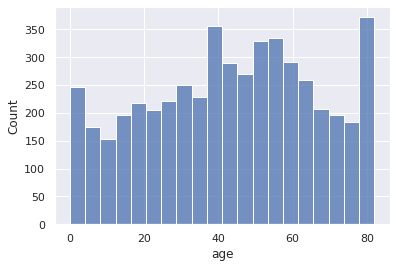

In [9]:
sns.set_theme(style='darkgrid')
sns.histplot(data.age)


<AxesSubplot:xlabel='work_type', ylabel='count'>

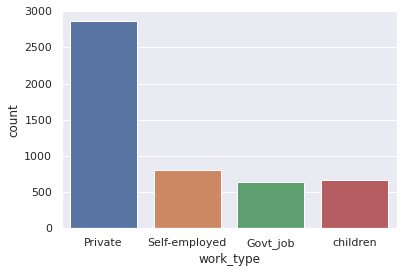

In [10]:
sns.countplot(data.iloc[:,5])

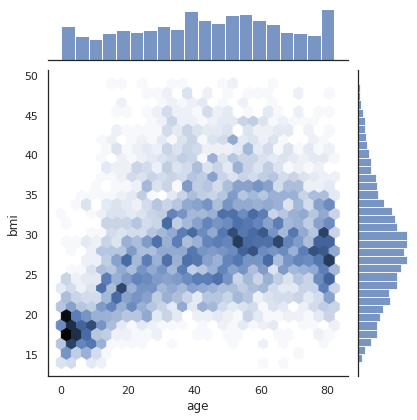

In [11]:
with sns.axes_style('white'):
    sns.jointplot("age", "bmi" , data, kind='hex')

# Model Building

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , precision_score , roc_auc_score , confusion_matrix ,recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [13]:
X = data.drop("stroke",axis= "columns")

In [14]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


In [15]:
y = data.stroke

In [16]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [17]:
y.shape

(4981,)

In [18]:
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)

In [19]:
X.ndim

2

In [20]:
X.size

21712179

In [21]:
X.shape

(4981, 4359)

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.4)

In [23]:
shapes = [X_train , X_test , y_train , y_test]

for i in shapes:
    print(i.size)

13024692
8687487
2988
1993


# Logistic Regression

In [24]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = logit.predict(X_test)

In [26]:
from sklearn import metrics

print("The accuracy score when using the logistic Regression model is {} %.".format(round(metrics.accuracy_score(y_pred, y_test)*100,2)))

The accuracy score when using the logistic Regression model is 95.08 %.


In [27]:
metrics.precision_score(y_test,y_pred)

0.2

In [28]:
metrics.recall_score(y_test,y_pred)

0.010526315789473684

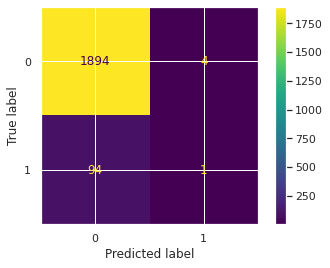

In [29]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logit, X_test, y_test)  
plt.show()

In [30]:
metrics.confusion_matrix(y_test,y_pred)

array([[1894,    4],
       [  94,    1]])

We can see both the function provides us the same type of result.

In [31]:
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1898
           1       0.20      0.01      0.02        95

    accuracy                           0.95      1993
   macro avg       0.58      0.50      0.50      1993
weighted avg       0.92      0.95      0.93      1993



In [32]:
logit_fpr, logit_tpr, thresholds = metrics.roc_curve(y_test, y_pred)
logit_auc = metrics.roc_auc_score(y_test, y_pred)

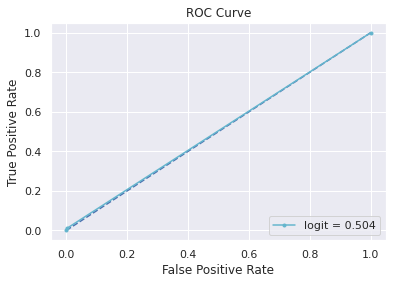

In [33]:
#ROC CURVE
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_fpr, logit_tpr, 'c', marker='.', label = 'logit = %0.3f' % logit_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

> Now we will be using the smote technique to increase the number of sample in our predictor variable y